# Hierarchical clustering
- Also known as hierarchical cluster analysis(HCA)

## Introduction

1. Hierarchical clustering is a general family of clustering algorithms that build nested clusters by **merging** or **splitting** them successively.
1. This hierarchy of clusters is represented as a tree (or dendrogram).
1. The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.
1. Strategies for hierarchical clustering generally fall into two types
    - **Agglomerative:** This is a **bottom-up** approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
        ![](https://github.com/rritec/powerbi/blob/master/images/PBI_0070.png?raw=true)
    - **Divisive:** This is a **top-down** approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

1. [Please read sklearn user guide](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

1. [Read wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering)

## AgglomerativeClustering
1. The **AgglomerativeClustering** object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

    - **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

    - **Maximum** or **complete linkage** minimizes the maximum distance between observations of pairs of clusters.

    - **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

    - **Single linkage** minimizes the distance between the closest observations of pairs of clusters.
    ------------------

----------------
**Scenario 1:** Working with Known iris data 

## Segment/Cluster `iris` Flowers

### Import required Modules and load data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
data = load_iris()
data=data["data"]
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Visualize data and identify best `n_clusters`

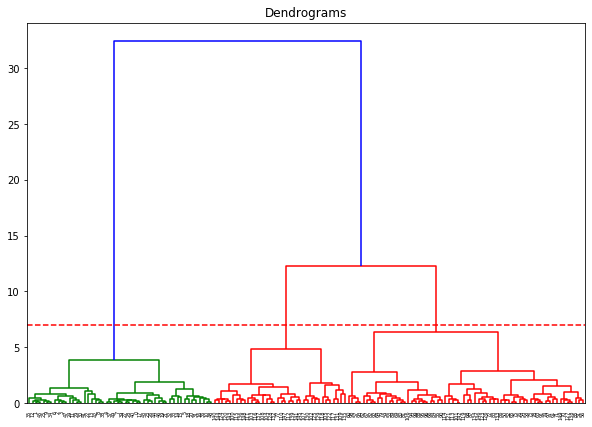

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
Z=shc.linkage(data, method='ward')
dend = shc.dendrogram(Z)
plt.axhline(y=7, color='r', linestyle='--')
plt.show()

### Apply `AgglomerativeClustering` and create clusters of samples

In [9]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)  
y=model.fit_predict(data)

In [10]:
np.unique(y,return_counts=True)

(array([0, 1, 2], dtype=int64), array([64, 50, 36], dtype=int64))

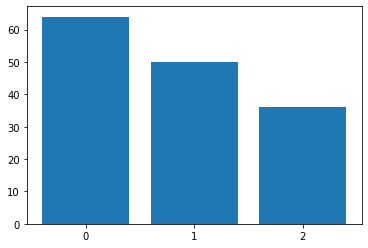

In [11]:
plt.bar(np.unique(y,return_counts=True)[0],np.unique(y,return_counts=True)[1],
       )
plt.xticks(np.unique(y,return_counts=True)[0])
plt.show()

## Segment Customers

**Scenario 2:** Our project goal is to use clustering techniques to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.
- [Refer more from kaggle](https://www.kaggle.com/saipraneeth1996/whole-sale-customer-segmentation-using-clustering)

### Import required Modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### Import data

In [13]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### preprocessing of data

In [14]:
#normalize?

In [15]:
df_scaled = normalize(df)
df_scaled[:5]

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, 5.39873747e-01,
        4.22740825e-01, 1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, 6.14703821e-01,
        5.99539873e-01, 1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, 5.49791784e-01,
        4.79632161e-01, 1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       [6.45937822e-05, 1.93781347e-04, 8.56836521e-01, 7.72541635e-02,
        2.72650355e-01, 4.13658581e-01, 3.27490476e-02, 1.15493683e-01],
       [7.91877886e-05, 1.18781683e-04, 8.95415919e-01, 2.14202968e-01,
        2.84996851e-01, 1.55010096e-01, 7.03583502e-02, 2.05294342e-01]])

In [16]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Visualize data and identify best `n_clusters`

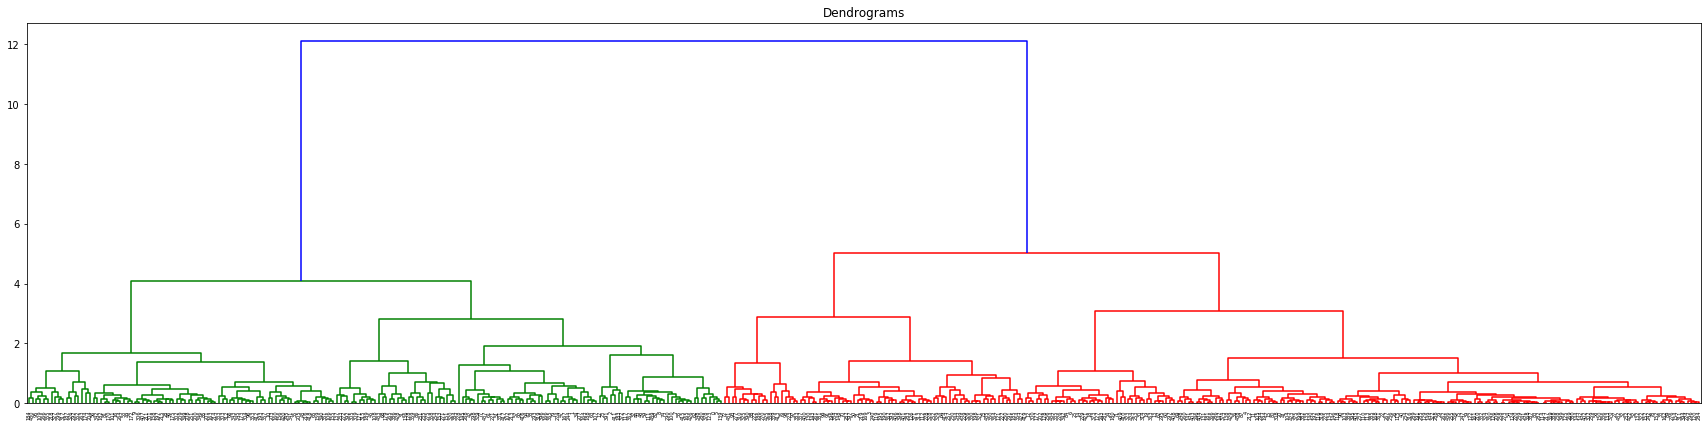

In [17]:
plt.figure(figsize=(30, 7))  
plt.title("Dendrograms")  
Z=shc.linkage(df_scaled, method='ward')
dend = shc.dendrogram(Z)
plt.show()

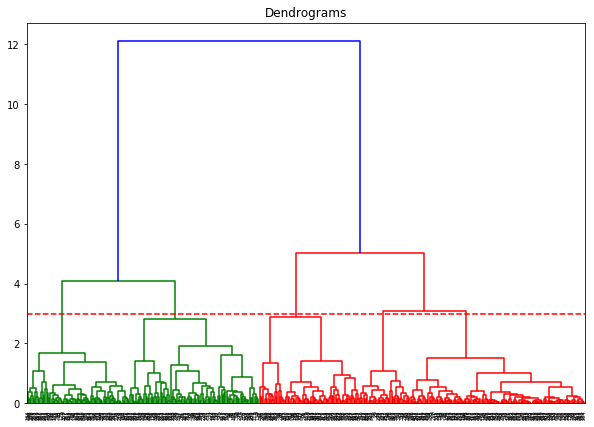

In [82]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
Z=shc.linkage(df_scaled, method='ward')
dend = shc.dendrogram(Z)
plt.axhline(y=3, color='r', linestyle='--')
plt.show()

### Apply `AgglomerativeClustering` and create clusters of samples

In [83]:
model =AgglomerativeClustering(n_clusters=5)  
y=model.fit_predict(df_scaled)

In [84]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([ 79, 102, 138,  81,  40], dtype=int64))

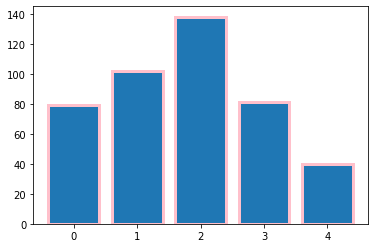

In [100]:
plt.bar(np.unique(y,return_counts=True)[0],np.unique(y,return_counts=True)[1],
       edgecolor ="pink",linewidth =3)
plt.show()